In [1]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt

from airLibs import airfoil as af
from airLibs import runF2w as f2w
from airLibs import plotting as aplt
from airLibs import runOpenFoam as of
from airLibs import runXFoil as xf

In [2]:
masterDir = os.getcwd()

# Reynolds And Mach and AoA

In [3]:
def ms2mach(ms):
    return ms / 340.29

def Re(v, c, n):
    return (v * c) / n

In [4]:
chordMax = 0.18
chordMin = 0.11
umax = 30
umin = 5
ne = 1.56e-5

In [5]:
Machmin = ms2mach(10)
Machmax = ms2mach(30)
Remax = Re(umax, chordMax, ne)
Remin = Re(umin, chordMin, ne)
AoAmax = 15
AoAmin = -6
NoAoA = (AoAmax - AoAmin) * 2 + 1

angles = np.linspace(AoAmin, AoAmax, NoAoA)
Reynolds = np.logspace(np.log10(Remin), np.log10(Remax), 20, base=10)
Mach = np.linspace(Machmax, Machmin, 10)

Reyn = Remin
MACH = Machmax

In [6]:
MACH

0.08816009873931058

In [6]:
os.chdir(masterDir)
CASE = "Rudder"
os.chdir(CASE)
caseDir = f"Reynolds_{np.format_float_scientific(Reyn,sign=False,precision=3).replace('+', '')}"
os.system(f"mkdir -p {caseDir}")
os.chdir(caseDir)
caseDir = os.getcwd()
cleaning = False
calcF2W = False
calcOpenFoam = True
calcXFoil = False

# Get Airfoil

In [7]:
for i in os.listdir('../'):
    if i.startswith("naca"):
        airfile = i
airfoil = airfile[4:]

# Generate Airfoil

(-0.05, 1.05, -0.04401097495392642, 0.04401097495392642)

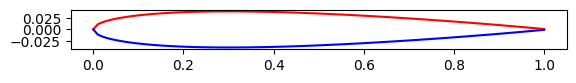

In [8]:
n_points = 100
pts = af.saveAirfoil(["s", airfile, airfoil, 0, n_points])
x, y = pts.T
plt.plot(x[: n_points ], y[: n_points], "r")
plt.plot(x[n_points:], y[n_points:], "b")

# plt.plot(x,y)
plt.axis("scaled")

# Foil2Wake

In [9]:
Ncrit = 9
ftrip_low = {"pos": 0.01, "neg": 0.02}
ftrip_up = {"pos": 0.01, "neg": 0.02}

if cleaning == True:
    f2w.removeResults(angles)
if calcF2W == True:
    f2w.setupF2W()
    clcd = f2w.runFw2(Reyn, MACH, ftrip_low, ftrip_up, angles, airfile)
clcdcmFW = f2w.makeCLCD(Reyn, MACH)

OK


# Xfoil

In [10]:
clcdcmXF = xf.runXFoil(Reyn, MACH, angles, airfoil)

# OpenFoam

In [15]:
os.chdir(caseDir)
maxITER = 10500
if cleaning == True:
    of.cleanOpenFoam()
if calcOpenFoam == True:
    of.makeMesh(airfile)
    of.setupOpenFoam(Reyn, MACH, angles, silent=True, maxITER=maxITER)
    of.runFoam(angles)
clcdcmOF = of.makeCLCD(angles)

bash: cannot set terminal process group (2269): Inappropriate ioctl for device
bash: no job control in this shell
open terminal failed: not a terminal


5.5 deg: Simulation Over
6.0 deg: Simulation Over
6.5 deg: Simulation Over
7.0 deg: Simulation Over
7.5 deg: Simulation Over
8.0 deg: Simulation Over
8.5 deg: Simulation Over
9.0 deg: Simulation Over
9.5 deg: Simulation Over
10.0 deg: Simulation Over
10.5 deg: Simulation Over
11.0 deg: Simulation Over
11.5 deg: Simulation Over
12.0 deg: Simulation Over
12.5 deg: Simulation Over
13.0 deg: Simulation Over
13.5 deg: Simulation Over
14.0 deg: Simulation Over
14.5 deg: Simulation Over
15.0 deg: Simulation Over
